<a href="https://colab.research.google.com/github/owenfink9/covid19/blob/master/covid_19_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
np.set_printoptions(suppress=True)

In [133]:
from google.colab import files
uploaded = files.upload()

Saving covid_kaggle.xlsx to covid_kaggle (2).xlsx


In [134]:
covid = pd.read_excel("covid_kaggle.xlsx")

In [135]:
covid.shape

(5644, 111)

# 1. Data Wash

Remove test results for other viruses, we'd like to predict the SARS-Cov-2 test result.

In [136]:
covid = covid.drop(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Parainfluenza 1', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Influenza B, rapid test', 'Influenza A, rapid test'], axis=1)

Remove irrelvalent Features including patients ID and patients intention to the ward level.

In [137]:
covid = covid.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)

Less than 100 patients among 5644 took urine tests.

In [138]:
urine_features = ['Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [139]:
covid = covid.drop(urine_features, axis=1)

Less than 100 patients among 5644 took aerial blood gas tests.

In [140]:
arterial_blood_gas_features = ['Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']

In [141]:
covid = covid.drop(arterial_blood_gas_features, axis=1)

Reamove features containing less than 100 patients' records

In [142]:
i = 0
for column in covid:
    if (covid[column].count() < 100):
        print(column, covid[column].count())
        covid = covid.drop(column, axis=1)

Mycoplasma pneumoniae 0
Ionized calcium  50
Magnesium 40
Fio2 (venous blood gas analysis) 1
Rods # 97
Segmented 97
Promyelocytes 97
Metamyelocytes 97
Myelocytes 97
Myeloblasts 97
Partial thromboplastin time (PTT)  0
Relationship (Patient/Normal) 91
Prothrombin time (PT), Activity 0
Vitamin B12 3
Ferritin 23
Arterial Lactic Acid 27
Lipase dosage 8
D-Dimer 0
Albumin 13


Drop constant features

In [143]:
covid = covid.loc[:,covid.apply(pd.Series.nunique) != 1]

Drop features has least patients' records

In [144]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]

In [145]:
# [ [covid.columns.get_loc(c), c] for c in sorted_features if c in covid]

Now all features contain at least 100 patients' record

In [146]:
covid_init = covid[sorted_features[-1]]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 5644
Patient age quantile 5644
Hemoglobin 603
Hematocrit 603
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 506
Creatinine 424
Urea 397
Potassium 371
Sodium 370
Strepto A 332
Aspartate transaminase 226
Alanine transaminase 225
Serum Glucose 208
Total Bilirubin 182
Indirect Bilirubin 182
Direct Bilirubin 182
Gamma-glutamyltransferase  153
Alkaline phosphatase 144
pO2 (venous blood gas analysis) 136
pH (venous blood gas analysis) 136
pCO2 (venous blood gas analysis) 136
Total CO2 (venous blood gas analysis) 136
Hb saturation (venous blood gas analysis) 136
HCO3 (venous blood gas analysis) 136
Base excess (venous blood gas analysis) 136
International normalized ratio (INR) 

In [147]:
removed_features = ['Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'International normalized ratio (INR)', 'Base excess (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)', 'pCO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0', 'Direct Bilirubin', 'Indirect Bilirubin', 'Total Bilirubin', 'Serum Glucose', 'Alanine transaminase', 'Aspartate transaminase', 'Strepto A', 'Sodium', 'Potassium', 'Urea', 'Creatinine']

In [148]:
covid = covid.drop(removed_features, axis=1)

In [149]:
covid.shape

(5644, 18)

Drop patients that have less than 10 records

In [150]:
for index, row in covid.iterrows():
    if row.count() < 10:
        covid.drop(index, inplace=True)

Now we have more than 500 records

In [151]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 602
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Patient age quantile 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Hemoglobin 602
Hematocrit 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 502


Drop NaN

In [152]:
covid = covid.dropna()

Map classification string to 0-1

In [153]:
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

In [154]:
covid.shape

(420, 18)

# 2. Train test split

In [155]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [156]:
y = covid["SARS-Cov-2 exam result"].to_numpy()

In [157]:
X = covid
X = X.drop(["SARS-Cov-2 exam result"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [158]:
X_train.shape

(294, 17)

In [159]:
X_test.shape

(126, 17)

In [160]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [161]:
print(np.sum(y_test), "positive among", len(y_test), 'patients')

18 positive among 126 patients


# SMOTE

In [162]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_smote_train, y_smote_train = os.fit_resample(X_train, y_train)

In [163]:
print(np.sum(y_smote_train), "positive among", len(y_smote_train), 'patients')

253 positive among 506 patients


# 3. Feature Selection

### 3.1 Basic Methods

#### 3.1.1 Drop constant and Quasi-constant features

In [164]:
from sklearn.feature_selection import VarianceThreshold

In [165]:
def drop_features(X_train, X_test, threshhold):
    sel = VarianceThreshold(threshold=threshhold)
    sel.fit(X_train)
    print("No. of constant features:",
        len([
            x for x in X_train.columns
            if x not in X_train.columns[sel.get_support()]
        ])
    )
    constant_features = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

    print(constant_features)
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)

In [166]:
drop_features(X_train, X_test, 0.01)
drop_features(X_smote_train, X_test, 0.01)

No. of constant features: 0
[]
No. of constant features: 0
[]


#### 3.1.2 Drop Duplicated Features

In [167]:
covid_t = covid.T
print("No. of Duplicated Features:", covid_t.duplicated().sum())
print(covid_t[covid_t.duplicated()].index.values)

No. of Duplicated Features: 0
[]


### 3.2 Correlations

In [168]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,Hematocrit,Hemoglobin,0.969368
1,Hemoglobin,Hematocrit,0.969368
2,Lymphocytes,Neutrophils,0.930390
3,Neutrophils,Lymphocytes,0.930390
4,Hematocrit,Red blood Cells,0.922796
5,Red blood Cells,Hematocrit,0.922796
6,Red blood Cells,Hemoglobin,0.900011
7,Hemoglobin,Red blood Cells,0.900011
8,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),0.856345
9,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),0.856345


In [169]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 17 total features


In [170]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1         feature2      corr
0  Hematocrit       Hemoglobin  0.969368
4  Hematocrit  Red blood Cells  0.922796

      feature1     feature2     corr
2  Lymphocytes  Neutrophils  0.93039

                        feature1                           feature2      corr
8  Mean corpuscular volume (MCV)  Mean corpuscular hemoglobin (MCH)  0.856345



In [171]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [172]:
corr_features = list((correlation(X_train, 0.8)))
print(corr_features)

['Mean corpuscular volume (MCV)', 'Red blood Cells', 'Hemoglobin']


In [173]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_smote_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [174]:
X_train.shape, X_smote_train.shape, X_test.shape

((294, 14), (506, 14), (126, 14))

### 3.3 Statistical Methods

#### 3.3.1 Mutual Information

In [175]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [176]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

<Axes: >

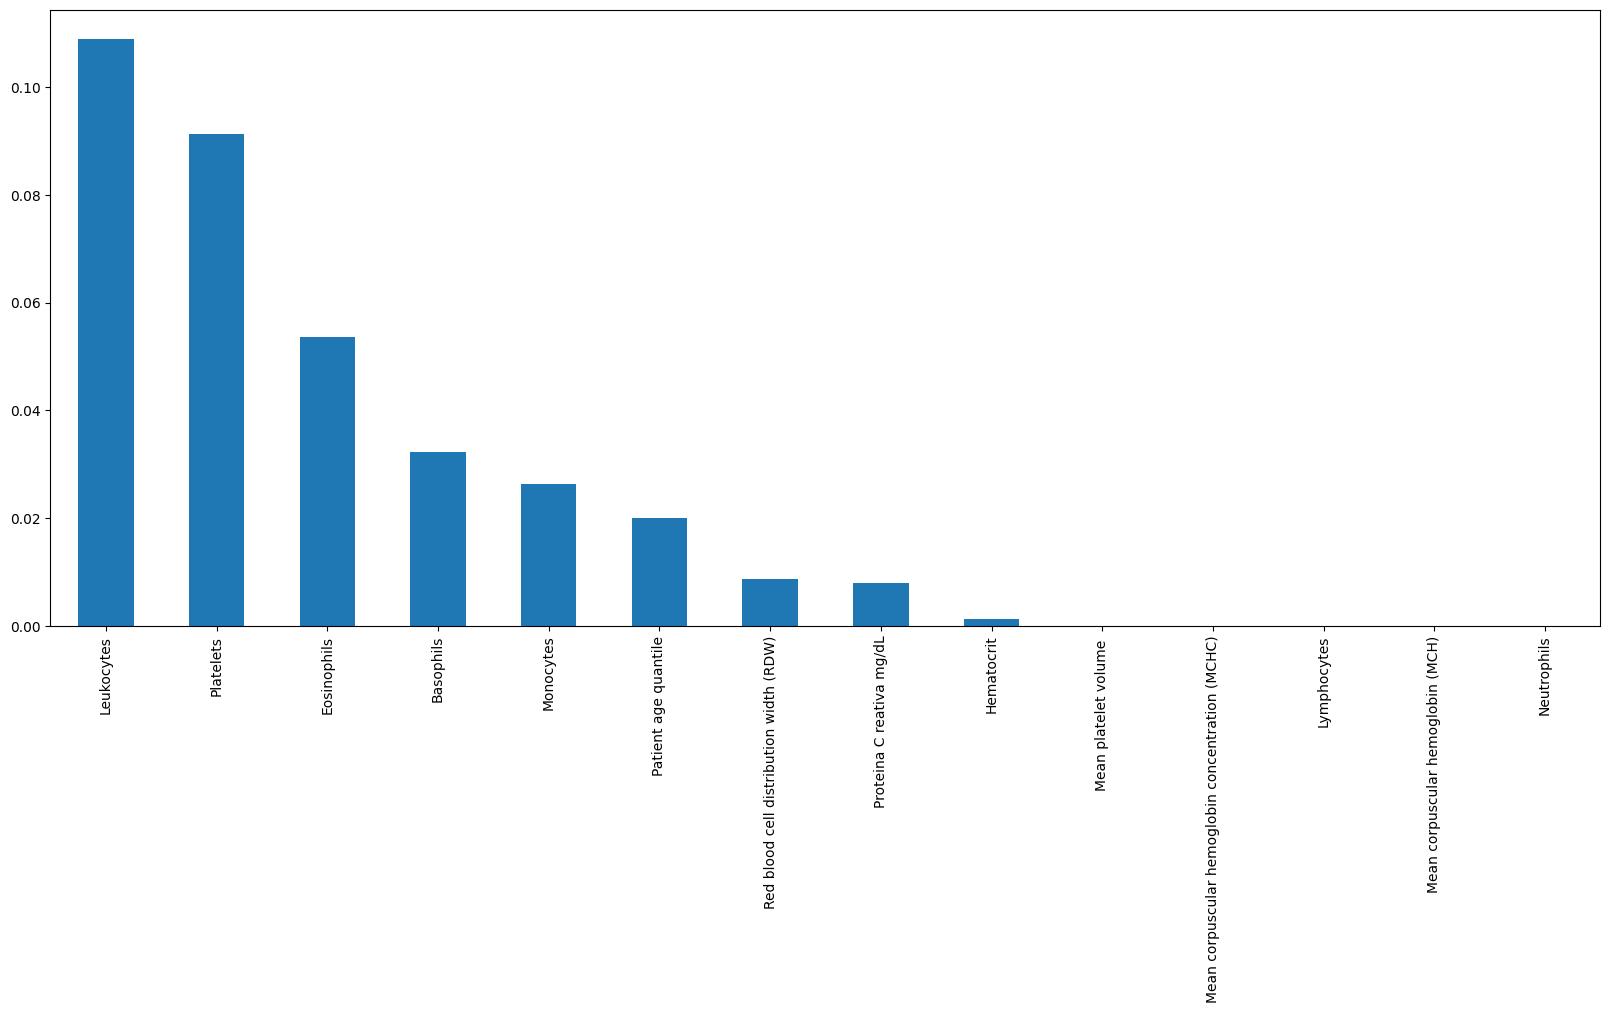

In [177]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [178]:
sel_ = SelectKBest(mutual_info_classif, k = 10).fit(X_train, y_train)
sel_smote_ = SelectKBest(mutual_info_classif, k = 10).fit(X_smote_train, y_smote_train)

In [179]:
mi_features = list(X_train.columns[ ~ sel_.get_support()].values)
mi_features_smote = list(X_smote_train.columns[ ~ sel_.get_support()].values)

In [180]:
mi_features

['Patient age quantile', 'Mean platelet volume ', 'Lymphocytes', 'Neutrophils']

In [181]:
mi_features_smote

['Patient age quantile', 'Mean platelet volume ', 'Lymphocytes', 'Neutrophils']

In [182]:
X_train.drop(labels=mi_features, axis=1, inplace=True)
X_smote_train.drop(labels=mi_features_smote, axis=1, inplace=True)
X_test.drop(labels=mi_features, axis=1, inplace=True)

In [183]:
X_train.shape

(294, 10)

In [184]:
X_smote_train.shape

(506, 10)

In [185]:
X_test.shape

(126, 10)

# 3. Classifier

In [186]:
import sklearn
import sklearn.ensemble
import sklearn.metrics
import xgboost as xgb

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
def cv_score(classifier, X, y, scoring):
    return cross_val_score(classifier, X, y, cv=5, scoring=scoring)

## 3.1.1 Decision Tree - Original

In [189]:
dt = sklearn.tree.DecisionTreeClassifier()

dt_f1 = cv_score(dt, X_train, y_train, 'f1')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [190]:
print(np.mean(dt_f1))

0.4283833813245578


In [191]:
dt_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))

Decision Tree
Precision:  0.7857142857142857
Recal:  0.2777777777777778
F1:  0.2702702702702703


In [192]:
print('Prediction:', ' '.join(str(e) for e in dt_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.1.2 Decision Tree - SMOTE

In [193]:
dt_smote = sklearn.tree.DecisionTreeClassifier()

dt_smote_f1 = cv_score(dt_smote, X_smote_train, y_smote_train, 'f1')

dt_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier()

In [194]:
print(np.mean(dt_smote_f1))

0.889585800707685


In [195]:
dt_smote_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))

Decision Tree
Precision:  0.7857142857142857
Recal:  0.2777777777777778
F1:  0.2702702702702703


In [196]:
print('Prediction:', ' '.join(str(e) for e in dt_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.1 Random Forests - Original

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_f1 = cv_score(rf, X_train, y_train, 'f1')

rf.fit(X_train, y_train)

RandomForestClassifier()

In [199]:
print(np.mean(rf_f1))

0.3338461538461538


In [200]:
rf_pred = rf.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))

Random Forest
Precision:  0.8571428571428571
Recal:  0.2222222222222222
F1:  0.3076923076923077


In [201]:
print('Prediction:', ' '.join(str(e) for e in rf_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.2 Random Forests - SMOTE

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf_smote = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_smote_f1 = cv_score(rf_smote, X_smote_train, y_smote_train, 'f1')

rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [204]:
print(np.mean(rf_smote_f1))

0.9436062127936872


In [205]:
rf_smote_pred = rf_smote.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))

Random Forest
Precision:  0.8809523809523809
Recal:  0.5555555555555556
F1:  0.5714285714285714


In [206]:
print('Prediction:', ' '.join(str(e) for e in rf_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.1 XGBoost - Original

In [207]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_f1 = cv_score(xgbc, np.array(X_train), np.array(y_train), 'f1')

# Fit the models
xgbc.fit(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /w

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [208]:
xgbc_pred = xgbc.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))

XGBoost
Precision:  0.8412698412698413
Recal:  0.6666666666666666
F1:  0.5454545454545454


In [209]:
print(np.mean(xgbc_f1))

0.4677777777777778


In [210]:
print('Prediction:', ' '.join(str(e) for e in xgbc_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.2 XGBoost - SMOTE

In [211]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc_smote = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_smote_f1 = cv_score(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), 'f1')

# Fit the models
xgbc_smote.fit(np.array(X_smote_train), np.array(y_smote_train))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:09:57] WARNING: /w

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [212]:
xgbc_smote_pred = xgbc_smote.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))

XGBoost
Precision:  0.7857142857142857
Recal:  0.7222222222222222
F1:  0.49056603773584906


In [213]:
print(np.mean(xgbc_smote_f1))

0.925623892822456


In [214]:
print('Prediction:', ' '.join(str(e) for e in xgbc_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.4.1 Neural Networks - Original

In [215]:
!pip install scikeras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [229]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [230]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

# Build function
def build_classifier():
    model = Sequential()
    model.add(Dense(activation='relu', input_dim=X_train.shape[1], units=10))
    model.add(Dropout(rate=0.1))
    model.add(Dense(kernel_initializer="uniform", activation='relu', units=15))
    model.add(Dropout(rate=0.1))
    model.add(Dense(kernel_initializer="uniform", activation='relu', units=5))
    model.add(Dropout(rate=0.1))
    model.add(Dense(kernel_initializer='uniform', activation='sigmoid', units=1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [231]:
nn = KerasClassifier(build_fn=build_classifier, epochs=200, batch_size=50, verbose=0)
# nn = build_classifier();

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


['accuracy', 'loss', 'val_accuracy', 'val_loss']


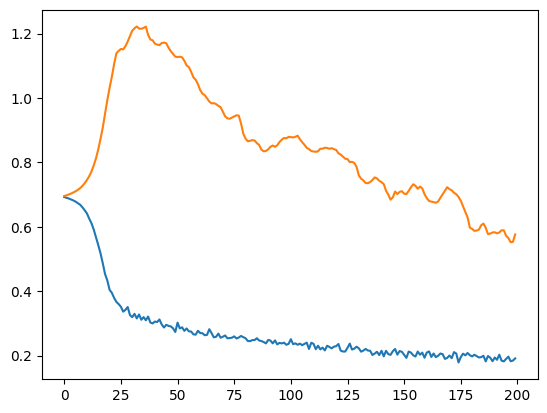

In [232]:
history_smote = nn.fit(X_smote_train, y_smote_train, batch_size=50, epochs=200, validation_split=0.5)
print(list(history_smote.history_.keys()))
plt.plot(history_smote.history_['loss'])
plt.plot(history_smote.history_['val_loss'])

In [220]:
#history = nn.fit(X_train, y_train, batch_size=50, epochs=200, validation_split = 0.5) #verbose = 2

In [221]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [233]:
nn_results = PermutationImportance(nn, cv="prefit").fit(X_train, y_train)
nn_importance = nn_results.feature_importances_

In [234]:
print(type(history_smote))

<class 'scikeras.wrappers.KerasClassifier'>


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


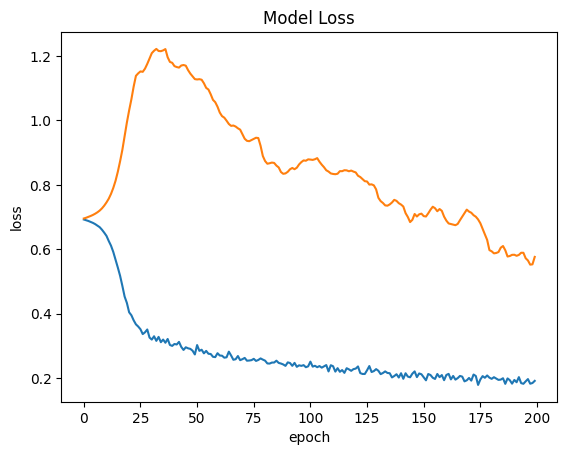

In [235]:
print(history_smote.model_.history.history.keys())
plt.plot(history_smote.model_.history.history['loss'])
plt.plot(history_smote.model_.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [239]:
nn_f1 = cross_val_score(nn, X_train, y_train, cv=5, scoring="f1").mean()
print("Mean F1 score:", nn_f1)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [240]:
print(np.mean(nn_f1))

NameError: name 'nn_f1' is not defined

In [241]:
nn_pred = nn.predict(X_test)
nn_pred[nn_pred > 0.5] = 1
nn_pred[nn_pred <= 0.5] = 0

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))

NN
Precision:  0.8968253968253969
Recall:  0.6666666666666666
F1:  0.6486486486486487


In [242]:
print('Prediction:', ' '.join(str(e[0]) for e in nn_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

IndexError: invalid index to scalar variable.

## 3.4.2 Neural Networks - SMOTE

In [243]:
def build_classifier() :
    nn = Sequential()
    nn.add(Dense(activation='relu', input_dim=X_smote_train.shape[1], units=10))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=15))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=5))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer='uniform',activation='sigmoid', units=1))
    nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [244]:
nn_smote = KerasClassifier(build_fn=build_classifier, epochs=200, batch_size=50, verbose=0)
# nn = build_classifier();

In [245]:
history_smote = nn_smote.fit(X_smote_train, y_smote_train, batch_size=50, epochs=200, validation_split = 0.5) #verbose = 2

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [246]:
nn_smote_results = PermutationImportance(nn_smote, cv="prefit").fit(X_smote_train, y_smote_train)
nn_smote_importance = nn_smote_results.feature_importances_

In [247]:
print(history_smote.history.keys())

AttributeError: 'KerasClassifier' object has no attribute 'history'

In [ ]:
plt.plot(history_smote.history['loss'])
plt.plot(history_smote.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'],loc='upper left')
plt.show()

In [ ]:
nn_smote_f1 = cv_score(nn_smote, X_smote_train, y_smote_train, 'f1')

In [ ]:
print(np.mean(nn_smote_f1))

In [ ]:
nn_smote_pred = nn_smote.predict(X_test)
nn_smote_pred[nn_smote_pred > 0.5] = 1
nn_smote_pred[nn_smote_pred <= 0.5] = 0

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, nn_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_smote_pred))

In [ ]:
print('Prediction:', ' '.join(str(e[0]) for e in nn_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

# 3.5.1 Logistic Regression - Original

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr_f1 = cv_score(lr, X_train, y_train, 'f1')

lr.fit(X_train, y_train)

In [ ]:
print(np.mean(lr_f1))

In [ ]:
lr_pred = lr.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))

In [ ]:
print('Prediction:', ' '.join(str(e) for e in lr_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

# 3.5.2 Logistic Regression - SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_smote = LogisticRegression()

lr_smote_f1 = cv_score(lr_smote, X_smote_train, y_smote_train, 'f1')

lr_smote.fit(X_smote_train, y_smote_train)

In [ ]:
print(np.mean(lr_smote_f1))

In [ ]:
lr_smote_pred = lr_smote.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))

In [ ]:
print('Prediction:', ' '.join(str(e) for e in lr_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

# 4. Prediction

In [ ]:
import math

In [ ]:
print("Decision Tree - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_pred))) / len(X_test)))

print()

print("Decision Tree - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_smote_pred))) / len(X_test)))

print()

print("Random Forest - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_pred))) / len(X_test)))

print()

print("Random Forest - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_smote_pred))) / len(X_test)))

print()

print("XGBoost - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_pred))) / len(X_test)))

print()

print("XGBoost - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))) / len(X_test)))

print()

print("NN - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, nn_pred)) * (sklearn.metrics.accuracy_score(y_test, nn_pred))) / len(X_test)))

print()

print("NN - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, nn_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, nn_smote_pred))) / len(X_test)))

print()

print("LR - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_pred))) / len(X_test)))

print()

print("LR - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_smote_pred))) / len(X_test)))

print()

print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(true_output, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(true_output, stack_pred))
print("F1: ", sklearn.metrics.f1_score(true_output, stack_pred))

In [ ]:
print('Original:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_pred))
print('Neural Network:', ' '.join(str(e[0]) for e in nn_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_pred))
print()
print('SMOTE:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_smote_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_smote_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_smote_pred))
print('Neural Network:', ' '.join(str(e[0]) for e in nn_smote_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_smote_pred))
print()
print('      Stacking:', ' '.join(str(e) for e in stack_pred))
print('         Truth:', ' '.join(str(e) for e in y_test))

#FLAML

In [ ]:
!pip install flaml

In [ ]:
#rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

#rf_f1 = cv_score(rf, X_train, y_train, 'f1')

#rf.fit(X_train, y_train)
from flaml import AutoML

automl_clf = AutoML()
automl_f1 = cv_score(automl_clf, X_train, y_train, 'f1')
automl_clf.fit(X_train, y_train, task="classification", )

In [ ]:
flaml_pred = automl_clf.predict(np.array(X_test))
print("FLAML")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, flaml_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, flaml_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, flaml_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, flaml_pred)) * (sklearn.metrics.accuracy_score(y_test, flaml_pred))) / len(X_test)))

# 5. Save Results

## 5.1 Save model

In [ ]:
import pickle

In [ ]:
with open("model/model-3_kaggle.pkl", 'wb') as f:
    pickle.dump([dt, rf, xgbc], f)
# with open("model-4.pkl", 'wb') as f:
#     pickle.dump([dt, rf, xgbc, nn], f)
with open("dataset/dataset_kaggle.pkl", 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [ ]:
nn.model.save('model/nn_kaggle.h5')

## 5.2 Load Model

In [ ]:
import keras
from keras.models import load_model

In [ ]:
nn = load_model("model/nn_kaggle.h5")

In [ ]:
with open("model/model-3_kaggle.pkl", 'rb') as f:
    [dt, rf, xgbc] = pickle.load(f)

In [ ]:
with open("dataset/dataset_kaggle.pkl", 'rb') as f:
    [X_train, X_test, y_train, y_test] = pickle.load(f)

# 6. Explain

## 6.3 Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [ ]:
fi = {}
fi["dt"] = []
fi["rf"] = []
fi["xgbc"] = []
fi["nn"] = []

**Decition Tree**

In [ ]:
dt_results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
dt_importance = dt_results.importances_mean
for i,v in enumerate(dt_importance):
    if v != 0:
        fi["dt"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [ ]:
fi["dt"] = sorted(fi["dt"], key=lambda x: x['value'], reverse=True)

**Random Forests**

In [ ]:
rf_results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
rf_importance = rf_results.importances_mean
for i,v in enumerate(rf_importance):
    if v != 0:
        fi["rf"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [ ]:
fi["rf"] = sorted(fi["rf"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree**

In [ ]:
xgbc_results = permutation_importance(xgbc, np.array(X_train), np.array(y_train), scoring='accuracy')
xgbc_importance = xgbc_results.importances_mean
for i,v in enumerate(xgbc_importance):
    if v != 0:
        fi["xgbc"].append({
            'name': X_train.columns[i],
            'value': v
        })

**Neural Networks**

In [ ]:
for i,v in enumerate(nn_importance):
    if v != 0:
        fi["nn"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [ ]:
fi["nn"] = sorted(fi["nn"], key=lambda x: x['value'], reverse=True)

**Summmary**

In [ ]:
print("Decision Tree")
for i in fi["dt"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

In [ ]:
print("Random Forests")
for i in fi["rf"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

In [ ]:
print("Gradient Boosted Trees")
for i in fi["xgbc"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

In [ ]:
print("Neural Networks")
for i in fi["nn"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

## 6.1 Partial Dependence Plot

In [ ]:
from sklearn.inspection import plot_partial_dependence

In [ ]:
X_train.columns

In [ ]:
plot_partial_dependence(xgbc, X_train, [4])

In [ ]:
nn._estimator_type = 'classifier'

In [ ]:
plot_partial_dependence(xgbc, X_train, [3, 4])
fig = plt.gcf()
fig.subplots_adjust(hspace=0.3)
# fig.savefig("nn_pdp_crp_ntproBNP")

In [ ]:
covid[covid['SARS-Cov-2 exam result'] == 1]['Leukocytes'].mean()

In [ ]:
covid[covid['SARS-Cov-2 exam result'] == 0]['Leukocytes'].mean()

## 6.2 Individual Conditional Expectation (ICE)

In [ ]:
def my_ice(model, X, feat_idx):
#     X = np.array(X)
    fmax, fmin = np.max(np.array(X)[:, feat_idx]), np.min(np.array(X)[:, feat_idx])
    frange = np.linspace(fmin, fmax, 100)
    preds = []
    for x in frange:
        X_ = X.copy()
        X_.iloc[:, feat_idx] = x
        pred = model.predict_proba(X_)
#         print(pred.shape)
        preds.append(pred[:, 1])
    return (frange, np.array(preds))

In [ ]:
X_train.columns

In [ ]:
LYM_data = my_ice(xgbc, X_train, 6)
CRP_data = my_ice(xgbc, X_train, 16)

In [ ]:
#           'axes.titlesize': 20}
# plt.rcParams.update(parameters)

f = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(LYM_data[0], LYM_data[1])
plt.xlabel('NTproBNP')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel('Individual Conditional Expectation')

plt.subplot(122)
plt.plot(CRP_data[0], CRP_data[1])
plt.xlabel('CRP2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

f.savefig('nn_ice_crp_ntproBNP.png')


## 6.4 LIME

In [ ]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth='3')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
!pip install lime
from lime import lime_tabular

In [ ]:
X_train.columns

In [ ]:
X_train = X_train.rename(columns={"Mean corpuscular hemoglobin concentration\xa0(MCHC)": "MCHC", "Proteina C reativa mg/dL": "CRP", "Patient age quantile":"Age"})

In [ ]:
X_test.iloc[0]

In [ ]:
y_test[0]

**Desition Tree**

In [ ]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', dt.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
# exp.show_in_notebook(show_table=True, show_all=False)

**Random Forest**

In [ ]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', rf.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),
                                              feature_names= X_train.columns, class_names = class_names,
                                              discretize_continuous=True)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = rf.predict_proba, num_features = 5)

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**XGBC**

In [ ]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', xgbc.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**NN**

In [ ]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', nn.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

In [ ]:
def predict_fn_nn(x_in):
    prob_severe = nn.predict(x_in)
    prob_normal = 1 - prob_severe
    print(np.concatenate((prob_normal, prob_severe), axis=1).shape)
    return np.array(np.concatenate((prob_normal, prob_severe), axis=1))

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = predict_fn_nn, num_features = 5)

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

# Metrics

In [ ]:
!pip install shap
import shap
shap.initjs()
!pip install alibi
from alibi.explainers import KernelShap

In [ ]:
!pip install aix360
from aix360.metrics import faithfulness_metric, monotonicity_metric

In [ ]:
x = X_test.iloc[0, :]
base = np.zeros(x.shape[0])

**Random Forests**

lime

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),
                                              feature_names= X_train.columns, class_names = class_names,
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0
predicted_class = rf.predict(X_test)[i]

exp = explainer.explain_instance(np.array(X_test)[i, :], rf.predict_proba, num_features=5, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]
fait = faithfulness_metric(rf, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

shap

In [ ]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)
ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

**Gradient Boosted Trees**

Lime

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),
                                              feature_names= X_train.columns, class_names = ['normal', 'severe'],
                                              discretize_continuous=True)
ncases = X_test.shape[0]
i = 0

predicted_class = xgbc_pred[i]

exp = explainer.explain_instance(np.array(X_test)[idx, :], xgbc.predict_proba, num_features = 10, top_labels=1)
le = exp.local_exp[1]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

SHAP

In [ ]:
explainer = KernelShap(xgbc.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

**Neural Networks**

lime

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),
                                              feature_names= X_train.columns, class_names = class_names,
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0

predicted_class = nn.predict(X_test)[i][0]

exp = explainer.explain_instance(np.array(X_test)[i, :], nn.predict_proba, num_features=10, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(nn, np.array(X_test)[i, :], coefs, base)
mon= monotonicity_metric(nn, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

SHAP

In [ ]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0

explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

# Stacking

In [ ]:
X_stacking = pd.DataFrame(X_test.index)
rf_smote_pred_df = pd.DataFrame(rf_smote_pred)
xgbc_pred_df = pd.DataFrame(xgbc_pred)
xgbc_smote_pred_df = pd.DataFrame(xgbc_smote_pred)
lr_pred_df = pd.DataFrame(lr_pred)
lr_smote_pred_df = pd.DataFrame(lr_smote_pred)

In [ ]:
X_stacking = pd.merge(X_stacking, rf_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_smote_pred_df, left_index=True, right_index=True)

In [ ]:
X_stacking.columns = ['id','Random_Forest_SMOTE','XGBoost','XGBoost_SMOTE','Logistic_Regression','Logistic_Regression_SMOTE']
X_stacking['Average'] = ( X_stacking['Random_Forest_SMOTE'] + X_stacking['XGBoost'] + X_stacking['XGBoost_SMOTE'] + X_stacking['Logistic_Regression'] + X_stacking['Logistic_Regression_SMOTE'] ) / 5

In [ ]:
X_stacking['Prediction'] = [1 if x > 0.5 else 0 for x in X_stacking['Average']]

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['True_Output']

stack_data = pd.merge(X_stacking, y_test_df, left_index=True, right_index=True)

In [ ]:
stack_data

In [ ]:
stack_pred = np.array(stack_data['Prediction'])
true_output = np.array(stack_data['True_Output'])

In [ ]:
print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(true_output, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(true_output, stack_pred))
print("F1: ", sklearn.metrics.f1_score(true_output, stack_pred))